# Text Cleaning & Processing 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500000)
logic_df = pd.read_csv('logic_df_final.csv', index_col=0)

In [2]:
logic_df.shape

(5890, 4)

# Processing 

In [3]:
#clean text 
#tokenize text
#use vectorizers 
#Count Vectorizer does one hot encoding 

**Remove all irrelevant characters such as any non alphanumeric characters**

In [4]:
logic_df.lyric = logic_df.lyric.str.replace(r'([^\s\w]|_)+', '')

In [5]:
logic_df.head()

,album,artist,lyric,song
0,Undeniable (2012),Young Sinatra,Yeah pass the mic before I jack it like goretex,Disgusting
1,Undeniable (2012),Young Sinatra,Bust like raw sex rappers suck like vortex,Disgusting
2,Undeniable (2012),Young Sinatra,The life of a Don We living like kings and killing our pawns,Disgusting
3,Undeniable (2012),Young Sinatra,Boy the seconds its on dont know where we going,Disgusting
4,Undeniable (2012),Young Sinatra,Im flowing and killing this shit from dusk till dawn,Disgusting


**make all the text data lowercase**

In [6]:
logic_df.lyric = logic_df.lyric.str.lower()

In [7]:
logic_df.head()

,album,artist,lyric,song
0,Undeniable (2012),Young Sinatra,yeah pass the mic before i jack it like goretex,Disgusting
1,Undeniable (2012),Young Sinatra,bust like raw sex rappers suck like vortex,Disgusting
2,Undeniable (2012),Young Sinatra,the life of a don we living like kings and killing our pawns,Disgusting
3,Undeniable (2012),Young Sinatra,boy the seconds its on dont know where we going,Disgusting
4,Undeniable (2012),Young Sinatra,im flowing and killing this shit from dusk till dawn,Disgusting


### i could do a lot more text processing here.. like removing irrelevant words, combine misspelled words, lemmatization.. going to start with a base dataset first though.. just doing the most minimal processing 

**create a new column that has tokenized lyrics** -- ALSO TRY SPACY for more features (Owen has pipeline in Slack Resources)

In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Benjamin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
logic_df['tokenized_lyrics'] = logic_df.lyric.apply(word_tokenize) 
logic_df.head()

,album,artist,lyric,song,tokenized_lyrics
0,Undeniable (2012),Young Sinatra,yeah pass the mic before i jack it like goretex,Disgusting,"[yeah, pass, the, mic, before, i, jack, it, like, goretex]"
1,Undeniable (2012),Young Sinatra,bust like raw sex rappers suck like vortex,Disgusting,"[bust, like, raw, sex, rappers, suck, like, vortex]"
2,Undeniable (2012),Young Sinatra,the life of a don we living like kings and killing our pawns,Disgusting,"[the, life, of, a, don, we, living, like, kings, and, killing, our, pawns]"
3,Undeniable (2012),Young Sinatra,boy the seconds its on dont know where we going,Disgusting,"[boy, the, seconds, its, on, dont, know, where, we, going]"
4,Undeniable (2012),Young Sinatra,im flowing and killing this shit from dusk till dawn,Disgusting,"[im, flowing, and, killing, this, shit, from, dusk, till, dawn]"


**Count Vectorizer - one hot encode our data** 

In [10]:
#create a list of all the unique words in the lyrics

unique_words = []
for line in logic_df.tokenized_lyrics:
    for x in line:
        if x not in unique_words:
            unique_words.append(x)
        else:
            pass

In [11]:
unique_words

['yeah',
 'pass',
 'the',
 'mic',
 'before',
 'i',
 'jack',
 'it',
 'like',
 'goretex',
 'bust',
 'raw',
 'sex',
 'rappers',
 'suck',
 'vortex',
 'life',
 'of',
 'a',
 'don',
 'we',
 'living',
 'kings',
 'and',
 'killing',
 'our',
 'pawns',
 'boy',
 'seconds',
 'its',
 'on',
 'dont',
 'know',
 'where',
 'going',
 'im',
 'flowing',
 'this',
 'shit',
 'from',
 'dusk',
 'till',
 'dawn',
 'just',
 'had',
 'with',
 'middle',
 'eastern',
 'girl',
 'pussy',
 'was',
 'bomb',
 'that',
 'last',
 'line',
 'made',
 'no',
 'sense',
 'these',
 'careers',
 'but',
 'make',
 'dollars',
 'cause',
 'all',
 'about',
 'fiscal',
 'year',
 'you',
 'me',
 'ill',
 'conjure',
 'up',
 'summon',
 'your',
 'fears',
 'wan',
 'na',
 'fight',
 'woop',
 'my',
 'own',
 'ass',
 'get',
 'here',
 'write',
 'tell',
 'rhymes',
 'bitch',
 'give',
 'fuck',
 'stab',
 'in',
 'gut',
 'call',
 'tummy',
 'tuck',
 'can',
 'ask',
 'ex',
 'quicker',
 'than',
 'two',
 'techs',
 'caressed',
 'by',
 'kid',
 'category',
 '5',
 'tourettes

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer().fit(unique_words)

In [14]:
vector = vectorizer.transform(logic_df.lyric)

In [15]:
vector_array = (vector.toarray())
vector_array.shape

(5890, 4412)

In [16]:
vector_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
vector_df = pd.DataFrame(vector_array)

### This is the most simple vectorizer... can do a LOT more things here (word2vec, etc)

In [18]:
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**adding the persona to each row**

In [19]:
persona_df = logic_df.artist

In [20]:
model_df = pd.concat([vector_df, persona_df], axis=1)

In [21]:
model_df.shape

(5890, 4413)

In [22]:
#model_df.to_csv("THEbagofwords_df.csv")

In [23]:
#do PCA - https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e
#start doing modeling! 

# Initial PCA Visualization

In [24]:
model_df_pca2 = model_df.copy()

In [25]:
#add a blank column 
model_df_pca2['persona'] = 0 

In [26]:
#setting the personas to numeric values (1,2,3)
model_df_pca2.loc[model_df_pca2["artist"] == 'Logic', "persona"] = 1
model_df_pca2.loc[model_df_pca2["artist"] == 'Bobby Tarantino', "persona"] = 2
model_df_pca2.loc[model_df_pca2["artist"] == 'Young Sinatra', "persona"] = 3

In [27]:
#drop the artist column 
model_df_pca2.drop(["artist"], axis=1, inplace=True)

In [28]:
# Separating out the features
x = model_df_pca2.loc[:, model_df_pca2.columns != 'persona']
# Separating out the target
y = model_df_pca2.persona

In [29]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: persona, dtype: int64

In [31]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
x = pca.fit_transform(x)

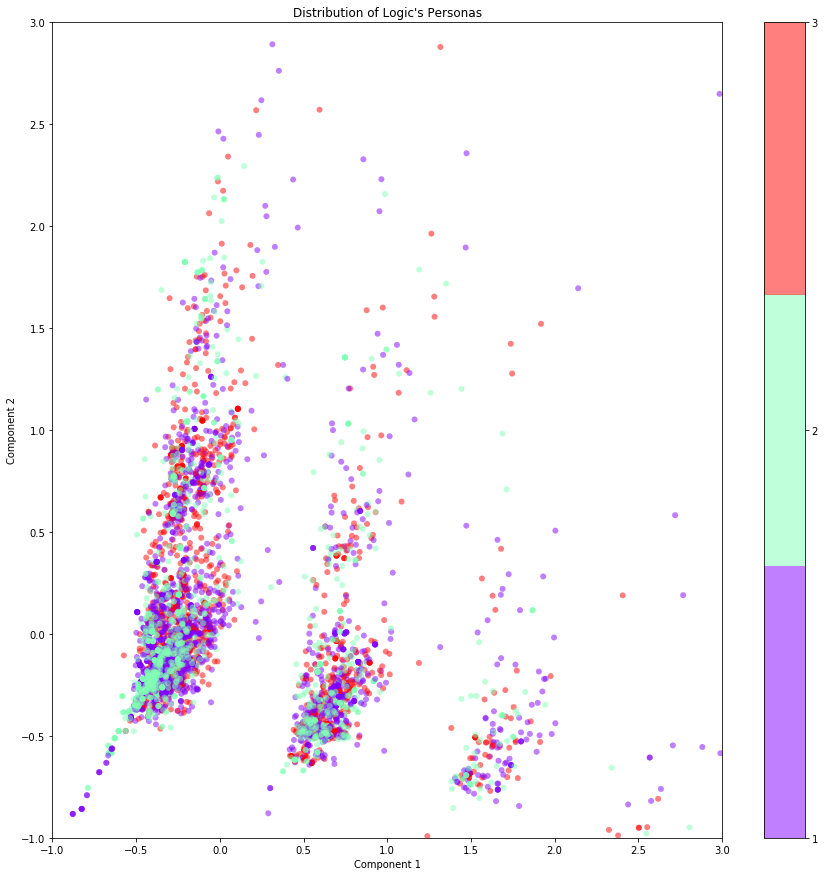

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(ticks=[1, 2, 3])
plt.rcParams['figure.figsize']=(15,15)
plt.title("Distribution of Logic's Personas")
plt.ylim((-1,3))
plt.xlim((-1,3))
plt.show()
#plt.savefig('PCA.png')

# Classification Modeling

start with our text dataset.. 

In [34]:
logic_df.head()

,album,artist,lyric,song,tokenized_lyrics
0,Undeniable (2012),Young Sinatra,yeah pass the mic before i jack it like goretex,Disgusting,"[yeah, pass, the, mic, before, i, jack, it, like, goretex]"
1,Undeniable (2012),Young Sinatra,bust like raw sex rappers suck like vortex,Disgusting,"[bust, like, raw, sex, rappers, suck, like, vortex]"
2,Undeniable (2012),Young Sinatra,the life of a don we living like kings and killing our pawns,Disgusting,"[the, life, of, a, don, we, living, like, kings, and, killing, our, pawns]"
3,Undeniable (2012),Young Sinatra,boy the seconds its on dont know where we going,Disgusting,"[boy, the, seconds, its, on, dont, know, where, we, going]"
4,Undeniable (2012),Young Sinatra,im flowing and killing this shit from dusk till dawn,Disgusting,"[im, flowing, and, killing, this, shit, from, dusk, till, dawn]"


In [35]:
model_df = logic_df.drop(["album", "song", "tokenized_lyrics"], axis=1)

In [36]:
model_df.head()

,artist,lyric
0,Young Sinatra,yeah pass the mic before i jack it like goretex
1,Young Sinatra,bust like raw sex rappers suck like vortex
2,Young Sinatra,the life of a don we living like kings and killing our pawns
3,Young Sinatra,boy the seconds its on dont know where we going
4,Young Sinatra,im flowing and killing this shit from dusk till dawn


let's train/test split

In [60]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(model_df, test_size=0.2, random_state=1234)

In [61]:
#split both into predictor and response
x_train = train_data.lyric
y_train = train_data.artist


x_test = test_data.lyric
y_test = test_data.artist

In [48]:
x_train

504     i think nothin of it                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
785     so i might just might just i dont know                                                                                                                                                                                                                                                                                                                                                                                     

# Models - Bag of Words Models (Count Vectorizer)

## multinomial naive bayes 

**creating our pipeline with gridsearch!**

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#create pipeline
pipe = Pipeline([('vect', CountVectorizer()), ('nb', MultinomialNB())])
#set param_grid
param_grid = {'vect__stop_words':['english', None], 'vect__min_df':[0,1,3,5,15], 'nb__alpha': [0.1, 0.5, 1, 2]}
#grid search through the parameters 
grid = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vect__stop_words': ['english', None], 'vect__min_df': [0, 1, 3, 5, 15], 'nb__alpha': [0.1, 0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
grid.best_params_

{'nb__alpha': 1, 'vect__min_df': 0, 'vect__stop_words': None}

In [55]:
from sklearn.model_selection import cross_val_score
grid_score = cross_val_score(grid, x_train, y_train, cv=5).mean()
grid_score

0.634133736431693

let's test this on our test set

In [51]:
y_test_pred = grid.predict(x_test)
y_test_pred

array(['Young Sinatra', 'Logic', 'Young Sinatra', ..., 'Young Sinatra',
       'Logic', 'Logic'], dtype='<U15')

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.6723259762308998

In [44]:
grid.predict(["deep thoughts and equality"])

array(['Logic'], dtype='<U15')

In [45]:
grid.predict(["one day imma make it"])

array(['Young Sinatra'], dtype='<U15')

In [ ]:
#got worse on test set

## KN Classifier 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#create pipeline
pipe = Pipeline([('vect', CountVectorizer()), ('knc', KNeighborsClassifier())])
#set param_grid
param_grid = {'vect__stop_words':['english', None], 'vect__min_df':[1,3,5,15], 'knc__n_neighbors': [1,2,3,4,5,6,7], 'knc__leaf_size': [30,40,50,60], 'knc__weights':['uniform', 'distance']}
#grid search through the parameters 
grid3 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid3.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vect__stop_words': ['english', None], 'vect__min_df': [1, 3, 5, 15], 'knc__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'knc__leaf_size': [30, 40, 50, 60], 'knc__weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
grid3.best_params_

In [59]:
y_test_pred = grid3.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.6044142614601019

## SVC 

In [55]:
from sklearn.svm import SVC

#create pipeline
pipe = Pipeline([('vect', CountVectorizer()), ('svm', SVC(decision_function_shape='ovo'))])
#set param_grid
param_grid = {'vect__stop_words':['english', None], 'vect__min_df':[15,30,50,60 ], 'svm__C':[1, 2,5,10]}
#grid search through the parameters 
grid4 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid4.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vect__stop_words': ['english', None], 'vect__min_df': [15, 30, 50, 60], 'svm__C': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [51]:
grid4.best_params_

{'svm__C': 2, 'vect__min_df': 15, 'vect__stop_words': 'english'}

In [58]:
grid4_score = cross_val_score(grid4, x_train, y_train, cv=5).mean()
grid4_score

0.5628228328061521

In [56]:
y_test_pred = grid4.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.601018675721562

In [57]:
grid4.predict(['hello'])

array(['Logic'], dtype=object)

# Models - Tfidf Models 

## multinomial naive bayes

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [62]:
#create pipeline
pipe = Pipeline([('tfid', TfidfVectorizer()), ('tfidt', TfidfTransformer()),('nb', MultinomialNB())])
#set param_grid
param_grid = {'tfid__stop_words':['english', None], 'nb__alpha': [0.0001,0.001,0.005,0.1, 0.5, 1, 2]}
#grid search through the parameters 
grid2 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid2.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...linear_tf=False, use_idf=True)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfid__stop_words': ['english', None], 'nb__alpha': [0.0001, 0.001, 0.005, 0.1, 0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [41]:
grid2.best_params_

{'nb__alpha': 0.1, 'tfid__stop_words': None}

In [54]:
grid2_score = cross_val_score(grid2, x_train, y_train, cv=5).mean()
grid2_score

0.6404952949486622

In [63]:
from sklearn.metrics import accuracy_score
y_test_pred = grid2.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.6740237691001698

In [68]:
grid2.predict([])

array(['Bobby Tarantino'], dtype='<U15')

In [69]:
import pickle
with open('best_logic_model.pickle', 'wb') as handle:
    pickle.dump(grid2, handle)

# KN Classifier 

In [46]:
#create pipeline
pipe = Pipeline([('tfid', TfidfVectorizer()), ('tfidt', TfidfTransformer()),('knc', KNeighborsClassifier())])
#set param_grid
param_grid = {'tfid__stop_words':['english', None],  'knc__n_neighbors': [1,2,3,4,5,6,7], 'knc__leaf_size': [10,20,30,40,50,60], 'knc__weights':['uniform', 'distance']}
#grid search through the parameters 
grid3 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid3.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfid__stop_words': ['english', None], 'knc__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'knc__leaf_size': [30, 40, 50, 60], 'knc__weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
grid3.best_params_

{'knc__leaf_size': 30,
 'knc__n_neighbors': 4,
 'knc__weights': 'distance',
 'tfid__stop_words': None}

In [48]:
y_test_pred = grid3.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.6468590831918506

# SVC

In [49]:
from sklearn.svm import SVC

#create pipeline
pipe = Pipeline([('tfid', TfidfVectorizer()), ('tfidt', TfidfTransformer()), ('svm', SVC(decision_function_shape='ovo'))])
#set param_grid
param_grid = {'tfid__stop_words':['english', None], 'svm__C':[1, 2,5,10]}
#grid search through the parameters 
grid4 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid4.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfid__stop_words': ['english', None], 'svm__C': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
grid4.best_params_

{'svm__C': 1, 'tfid__stop_words': 'english'}

In [52]:
y_test_pred = grid4.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.4295415959252971